In [1]:
from torchvision import transforms
from detecto import core, utils, visualize
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
!pip install detecto

In [61]:
model = core.Model.load(r'C:\Users\avishek\OneDrive\Desktop\accuracy\model_weights_100_declr_0.001_g_0.5_new_red_augs.pth', ['dome'])
torch_model = model.get_internal_model()
#print(torch_model)
#type(torch_model)

Detection of x a1,2


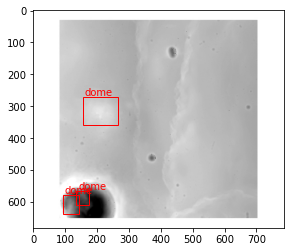

Detection of x c1,3,4


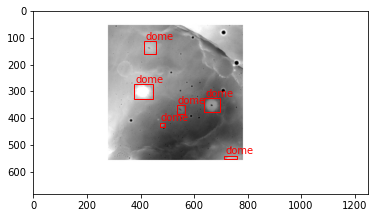

Detection of x v1-7


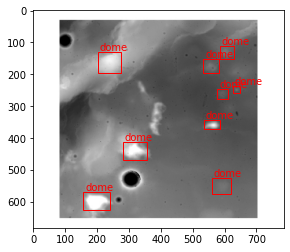

3 3 3 3
tensor([0.9917, 0.9657, 0.9598, 0.1779, 0.1098, 0.1024])


In [62]:
import glob
# from engine import evaluate
#test_data=core.Dataset('test/')
file=r'C:/Users/avishek/OneDrive/Desktop/accuracy/test_seed70'
#test_dataset = core.Dataset('test/')

label_list = []
box_list = []
score_list = []
image_list = []

for i in glob.glob(file + "/*.jpg"):

    image = utils.read_image(i)
    image_list.append(i)
    predictions = model.predict(image)
    labels, boxes, scores = predictions
    label_list.append(labels)
    box_list.append(boxes)
    score_list.append(scores)
    print('Detection of x {}'.format(i.split('\\')[-1].split('.')[0]))
    visualize.show_labeled_image(image,boxes,labels)

print(len(label_list), len(box_list), len(score_list), len(image_list))
print(score_list[1])


In [60]:
# Create an empty list where file name prefixes are appended
file_name_list = []

# Loop through the xml_list and add the file name to the file_name_list
for name in image_list:
    file_name_list.append(name.split('\\')[-1].split('.')[0])
print(file_name_list)
for file_name in file_name_list:
    f = open("C:/Users/avishek/OneDrive/Desktop/accuracy/detections/{}.txt".format(file_name), "w")
    for i in range(len(label_list)):  
        for j in range(len(box_list[i])):
            f.write("dome {} {} {} {} {}\n".format(score_list[i][j], box_list[i][j][0],box_list[i][j][1],box_list[i][j][2],box_list[i][j][3]))
                  
    f.close()

['a1,2', 'c1,3,4', 'v1-7']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


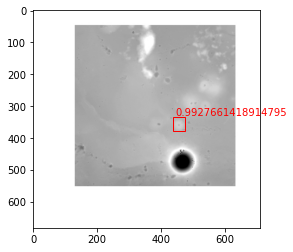

In [13]:
#for i in range(len(image_list)):
#for j in range(len(box_list[i])):
visualize.show_labeled_image(utils.read_image(image_list[2]), box_list[2][1], score_list[2][1])


In [67]:
import statistics
import numpy
Precision=['0.00', '0.00', '0.33', '0.50', '0.40', '0.33', '0.29', '0.38', '0.33', '0.30', '0.36', '0.42', '0.38', '0.36', '0.40', '0.38', '0.41', '0.39', '0.37', '0.35', '0.33', '0.32', '0.30', '0.29']
# p=[int(x) for x in Precision]
# print(str(p))
Recall= ['0.00', '0.00', '0.08', '0.15', '0.15', '0.15', '0.15', '0.23', '0.23', '0.23', '0.31', '0.38', '0.38', '0.38', '0.46', '0.46', '0.54', '0.54', '0.54', '0.54', '0.54', '0.54', '0.54', '0.54']

#print(statistics.mean(int(Recall)))
precisions = [float(x) for x in Precision]
mp=statistics.mean(precisions)
mp=0.52
print(mp)
recalls = [float(x) for x in Recall]
mr=statistics.mean(recalls)
mr=0.84
print(mr)
f1 = 2 * (((mp) * (mr)) / ((mp) + (mr)))
print((f1))
#print(f1)

0.52
0.84
0.6423529411764707
